# TMDB Box Office Prediction

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2">Read data</a></span><ul class="toc-item"><li><span><a href="#Train-set" data-toc-modified-id="Train-set-2.1">Train set</a></span></li><li><span><a href="#Test-set" data-toc-modified-id="Test-set-2.2">Test set</a></span></li></ul></li><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-3">Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Numeric-features" data-toc-modified-id="Numeric-features-3.1">Numeric features</a></span><ul class="toc-item"><li><span><a href="#'revenue'-(TARGET)" data-toc-modified-id="'revenue'-(TARGET)-3.1.1">'revenue' (TARGET)</a></span></li><li><span><a href="#'budget'" data-toc-modified-id="'budget'-3.1.2">'budget'</a></span></li><li><span><a href="#'popularity'" data-toc-modified-id="'popularity'-3.1.3">'popularity'</a></span></li><li><span><a href="#'runtime'" data-toc-modified-id="'runtime'-3.1.4">'runtime'</a></span></li><li><span><a href="#'release_date'" data-toc-modified-id="'release_date'-3.1.5">'release_date'</a></span></li></ul></li><li><span><a href="#Categorical-Data" data-toc-modified-id="Categorical-Data-3.2">Categorical Data</a></span><ul class="toc-item"><li><span><a href="#'belongs_to_collection'" data-toc-modified-id="'belongs_to_collection'-3.2.1">'belongs_to_collection'</a></span></li><li><span><a href="#'homepage'" data-toc-modified-id="'homepage'-3.2.2">'homepage'</a></span></li><li><span><a href="#'original_language'" data-toc-modified-id="'original_language'-3.2.3">'original_language'</a></span></li><li><span><a href="#'overview'" data-toc-modified-id="'overview'-3.2.4">'overview'</a></span></li><li><span><a href="#'tagline'" data-toc-modified-id="'tagline'-3.2.5">'tagline'</a></span></li><li><span><a href="#'status'" data-toc-modified-id="'status'-3.2.6">'status'</a></span></li><li><span><a href="#'title'" data-toc-modified-id="'title'-3.2.7">'title'</a></span></li></ul></li><li><span><a href="#Dictionary-Data" data-toc-modified-id="Dictionary-Data-3.3">Dictionary Data</a></span><ul class="toc-item"><li><span><a href="#'genres'" data-toc-modified-id="'genres'-3.3.1">'genres'</a></span></li><li><span><a href="#'production_companies'" data-toc-modified-id="'production_companies'-3.3.2">'production_companies'</a></span></li><li><span><a href="#'production_countries'" data-toc-modified-id="'production_countries'-3.3.3">'production_countries'</a></span></li><li><span><a href="#'spoken_languages'" data-toc-modified-id="'spoken_languages'-3.3.4">'spoken_languages'</a></span></li><li><span><a href="#'Keywords'" data-toc-modified-id="'Keywords'-3.3.5">'Keywords'</a></span></li><li><span><a href="#'cast'" data-toc-modified-id="'cast'-3.3.6">'cast'</a></span></li><li><span><a href="#'crew'" data-toc-modified-id="'crew'-3.3.7">'crew'</a></span><ul class="toc-item"><li><span><a href="#Directing" data-toc-modified-id="Directing-3.3.7.1">Directing</a></span></li><li><span><a href="#Production" data-toc-modified-id="Production-3.3.7.2">Production</a></span></li><li><span><a href="#Writing" data-toc-modified-id="Writing-3.3.7.3">Writing</a></span></li><li><span><a href="#Sound" data-toc-modified-id="Sound-3.3.7.4">Sound</a></span></li><li><span><a href="#Costume-&amp;-Make-Up" data-toc-modified-id="Costume-&amp;-Make-Up-3.3.7.5">Costume &amp; Make-Up</a></span></li><li><span><a href="#Camera" data-toc-modified-id="Camera-3.3.7.6">Camera</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Final-dataset" data-toc-modified-id="Final-dataset-4">Final dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Train-set" data-toc-modified-id="Train-set-4.0.1">Train set</a></span></li><li><span><a href="#Test-set" data-toc-modified-id="Test-set-4.0.2">Test set</a></span></li></ul></li></ul></li></ul></div>

Imports

In [1]:
## Inserisci qui la tua directory
dir_ = 'C:/Users/feder/Desktop/Data&Web Mining/Progetto/'

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
from statistics import mode
from sklearn.preprocessing import MultiLabelBinarizer 
from sklearn.decomposition import PCA
import seaborn as sns
import utils as ut

In [2]:
pd.set_option("display.max_columns", None)

## Read data

### Train set

In [3]:
#Dataset che comprende i primi 3000 film su cui fare training dei modelli
train_df = pd.read_csv(dir_+'train.csv')
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

### Test set


In [5]:
#Dataset che contiene i restanti 4398 film da utilizzare come test
test_df = pd.read_csv(dir_+'test.csv')
test_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

**Osservazioni**

- Ci sono molti film con 0 nella colonna 'budget' :

In [7]:
len(train_df.query('budget == 0 ').index)

812

- La colonna 'imdb_id' ha sono valori unici, quindi posso eliminarla.

In [8]:
for df in [train_df, test_df]:
    df.drop(columns = 'imdb_id', inplace=True)

- Non penso che 'original_title' e 'poster_path' mi serviranno come feature, quindi le elimino.

In [9]:
for df in [train_df, test_df]:
    df.drop(columns = 'original_title', inplace=True)
    df.drop(columns = 'poster_path', inplace=True)

## Data Exploration 

### Numeric features

#### 'revenue' (TARGET)

In [10]:
train_df.loc[:, train_df.columns == 'revenue'].describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,3000.0,6.672585e+07,1.375323e+08,1.0,2379808.25,16807068.0,68919203.5,1.519558e+09


<AxesSubplot:title={'center':'Distribution of log(revenue)'}, xlabel='revenue', ylabel='Count'>

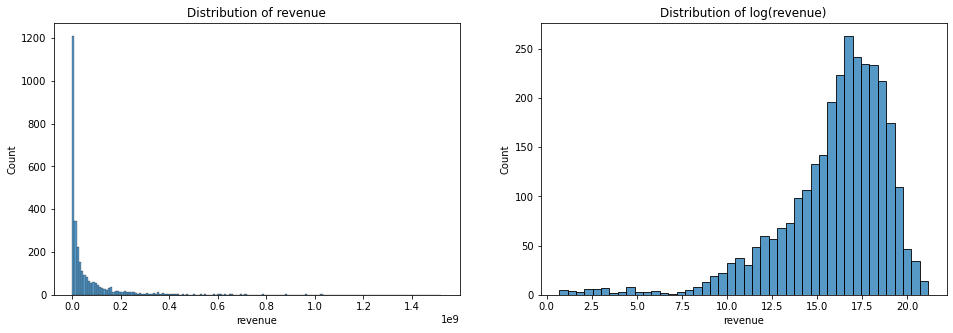

In [11]:
plt.figure(figsize = (16, 5))
ax1 = plt.subplot(1, 2, 1)
ax1.set_title('Distribution of revenue')
sns.histplot(train_df['revenue'])

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Distribution of log(revenue)')
sns.histplot(np.log1p(train_df['revenue']))

Con la trasformazione su scala logaritmica sembra assumere più chiaramente una distribuzione Normale, anche se asimmetrica a sinistra.

 Devo prendere il logaritmo di revenue poichè la competizione usa come metrica RMSLE (Root Mean Squared Log Error)

In [12]:
# train_df['log_revenue'] = np.log1p(train_df['revenue'])

#### 'budget'

In [13]:
train_df.loc[:, train_df.columns == 'budget'].describe().T

,count,mean,std,min,25%,50%,75%,max
budget,3000.0,22531334.11,3.702609e+07,0.0,0.0,8000000.0,29000000.0,380000000.0


In [14]:
test_df.loc[:, test_df.columns == 'budget'].describe().T

,count,mean,std,min,25%,50%,75%,max
budget,4398.0,2.264929e+07,3.689991e+07,0.0,0.0,7450000.0,28000000.0,260000000.0


<AxesSubplot:title={'center':'log(budget)'}, xlabel='budget', ylabel='Count'>

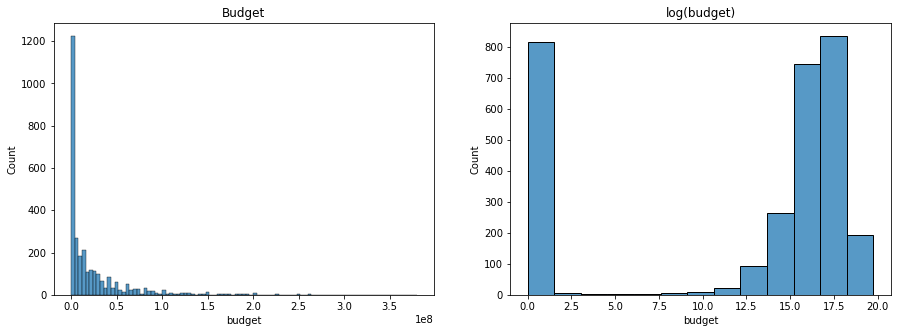

In [15]:
plt.figure(figsize = (15, 5))
# 'budget'
ax1 = plt.subplot(1,2,1)
ax1.set_title('Budget')
sns.histplot(train_df['budget'])

# 'log(budget)'
ax2 = plt.subplot(1,2,2)
ax2.set_title('log(budget)')
sns.histplot(np.log1p(train_df['budget']))

Sembrano esserci dei dati mancanti che sono stati inseriti come 0.

Vedo se c'è qualche relazione con la variabile target.

<AxesSubplot:title={'center':'log(budget) x log(revenue)'}, xlabel='budget', ylabel='revenue'>

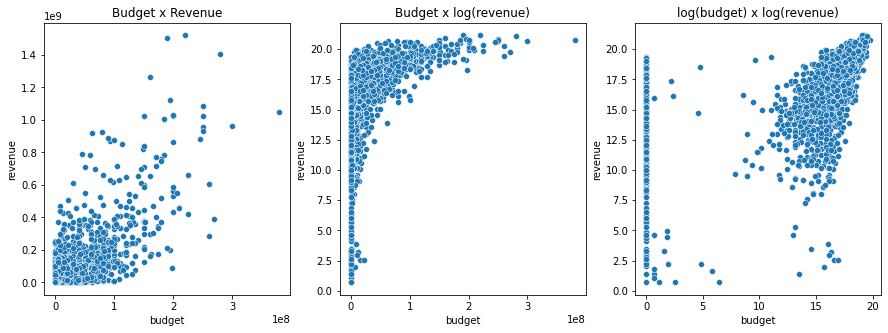

In [16]:
plt.figure(figsize = (15, 5))
# 'budget' e 'revenue'
ax1 = plt.subplot(1,3,1)
ax1.set_title('Budget x Revenue')
sns.scatterplot(x=train_df['budget'], y=train_df['revenue'])

# 'log(budget)' e 'log(revenue)'
ax2 = plt.subplot(1,3,2)
ax2.set_title('Budget x log(revenue)')
sns.scatterplot(x=train_df['budget'], y=np.log1p(train_df['revenue']))

# 'log(budget)' e 'log(revenue)'
ax3 = plt.subplot(1,3,3)
ax3.set_title('log(budget) x log(revenue)')
sns.scatterplot(x=np.log1p(train_df['budget']), y=np.log1p(train_df['revenue']))

#### 'popularity'

In [17]:
train_df.loc[:, train_df.columns == 'popularity'].describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,3000.0,8.463274,12.104,0.000001,4.018053,7.374861,10.890983,294.337037


<AxesSubplot:title={'center':'log(popularity)'}, xlabel='popularity', ylabel='Count'>

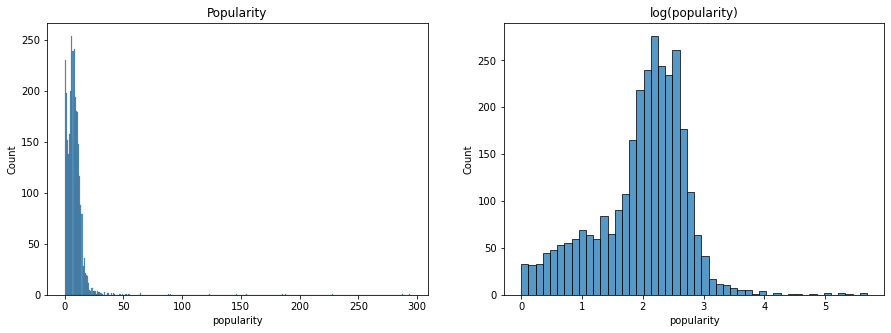

In [18]:
plt.figure(figsize = (15, 5))
# 'popularity'
ax1 = plt.subplot(1,2,1)
ax1.set_title('Popularity')
sns.histplot(train_df['popularity'])

# 'log(popularity)'
ax2 = plt.subplot(1,2,2)
ax2.set_title('log(popularity)')
sns.histplot(np.log1p(train_df['popularity']))

La distibuzione di 'popularity' è assimetrica anche dopo la trasformazione su scala logaritmica.

Vedo se c'è qualche relazione con la variabile target.

<AxesSubplot:title={'center':'log(popularity) x log(revenue)'}, xlabel='popularity', ylabel='revenue'>

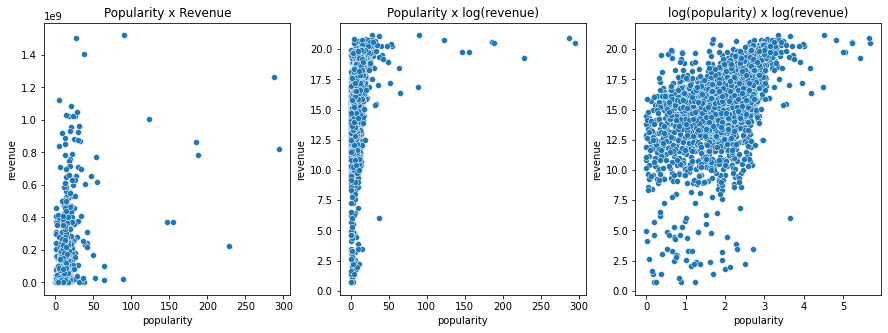

In [19]:
plt.figure(figsize = (15, 5))
# 'popularity' e 'revenue'
ax1 = plt.subplot(1,3,1)
ax1.set_title('Popularity x Revenue')
sns.scatterplot(x=train_df['popularity'], y=train_df['revenue'])

# 'log(popularity)' e 'log(revenue)'
ax2 = plt.subplot(1,3,2)
ax2.set_title('Popularity x log(revenue)')
sns.scatterplot(x=train_df['popularity'], y=np.log1p(train_df['revenue']))

# 'log(popularity)' e 'log(revenue)'
ax3 = plt.subplot(1,3,3)
ax3.set_title('log(popularity) x log(revenue)')
sns.scatterplot(x=np.log1p(train_df['popularity']), y=np.log1p(train_df['revenue']))

#### 'runtime'

In [20]:
train_df.loc[:, train_df.columns == 'runtime'].describe().T

,count,mean,std,min,25%,50%,75%,max
runtime,2998.0,107.856571,22.086434,0.0,94.0,104.0,118.0,338.0


**N.B.:** 'runtime' ha dei valori Nan in alcune righe del dataset, li sostituisco con la media.

In [21]:
train_df['runtime'] = train_df['runtime'].fillna(train_df['runtime'].mean())
test_df['runtime'] = test_df['runtime'].fillna(test_df['runtime'].mean())

<AxesSubplot:title={'center':'log(runtime)'}, xlabel='runtime', ylabel='Count'>

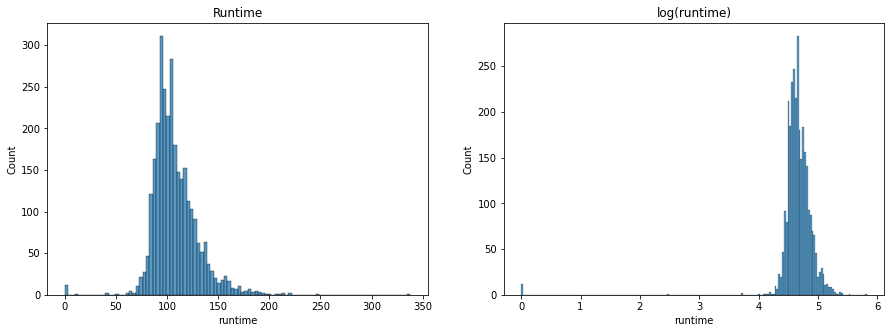

In [22]:
plt.figure(figsize = (15, 5))
# 'runtime'
ax1 = plt.subplot(1,2,1)
ax1.set_title('Runtime')
sns.histplot(train_df['runtime'])

# 'log(runtime)'
ax2 = plt.subplot(1,2,2)
ax2.set_title('log(runtime)')
sns.histplot(np.log1p(train_df['runtime']))


Ci sono degli outliers sullo 0 sicuramete dovuti ad informazioni mancanti.

Vedo se c'è qualche relazione con la variabile target.

<AxesSubplot:title={'center':'log(runtime) x log(revenue)'}, xlabel='runtime', ylabel='revenue'>

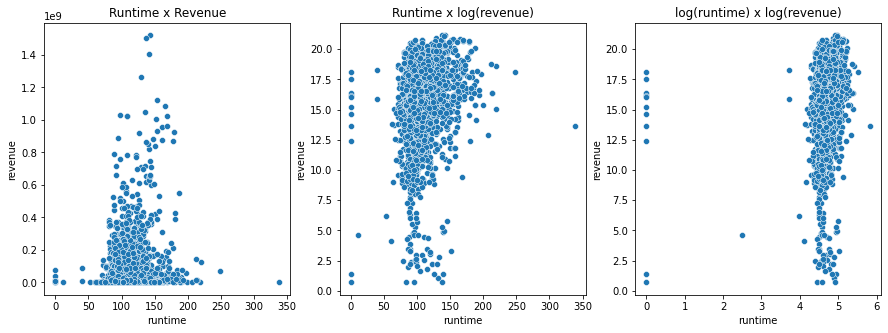

In [23]:
plt.figure(figsize = (15, 5))
# 'runtime' e 'revenue'
ax1 = plt.subplot(1,3,1)
ax1.set_title('Runtime x Revenue')
sns.scatterplot(x=train_df['runtime'], y = train_df['revenue'])

# 'log(runtime)' e 'log(revenue)'
ax2 = plt.subplot(1,3,2)
ax2.set_title('Runtime x log(revenue)')
sns.scatterplot(x=train_df['runtime'], y = np.log1p(train_df['revenue']))

# 'log(runtime)' e 'log(revenue)'
ax3 = plt.subplot(1,3,3)
ax3.set_title('log(runtime) x log(revenue)')
sns.scatterplot(x=np.log1p(train_df['runtime']), y = np.log1p(train_df['revenue']))

#### 'release_date'

Creo delle feature dalle date di rilascio dei film come: anno, giorno della settimana, mese, giorno del mese.

In [24]:
train_df['release_date'] = train_df['release_date'].apply(lambda x: ut.fix_date(x))
train_df['release_date'] = pd.to_datetime(train_df['release_date'])
train_df = ut.process_date(train_df)

In [25]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,original_language,overview,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_date_year,release_date_weekday,release_date_month,release_date_day
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,en,"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,4,2,20
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,en,Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,4,8,6
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,en,"Under the direction of a ruthless instructor, ...",64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,4,10,10
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,4,3,9
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,ko,Marine Boy is the story of a former national s...,1.148070,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,3,2,5


In [26]:
test_df['release_date'] = test_df['release_date'].apply(lambda x: ut.fix_date(x))
test_df['release_date'] = pd.to_datetime(test_df['release_date'])
test_df = ut.process_date(test_df)

In [27]:
train_df = train_df.drop(columns = 'release_date')
test_df = test_df.drop(columns = 'release_date')

Ora posso vedere l'andamento di revenue nel corso degli anni, mesi e giorni della settimana.

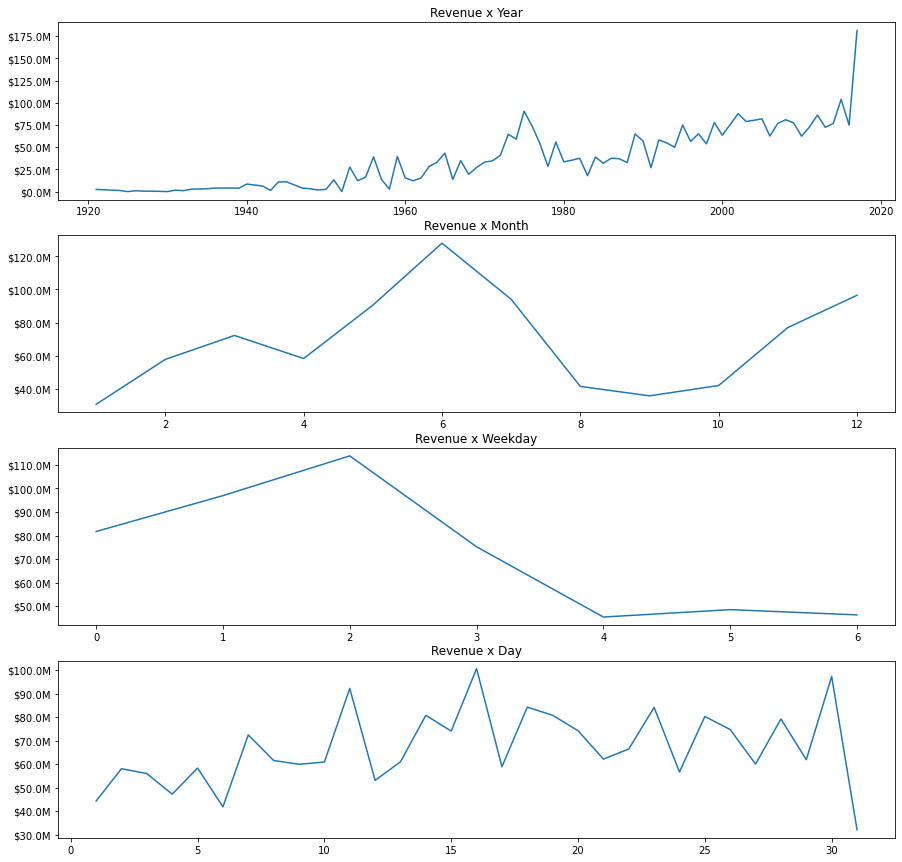

In [28]:
movie_year = train_df['release_date_year'].value_counts().sort_index()
year_revenue_mean = train_df.groupby(['release_date_year'])['revenue'].mean()

f = plt.figure(figsize = (15,15))
ax1 = f.add_subplot(4,1,1)
ax1.yaxis.set_major_formatter(ut.millions)
ax1.set_title('Revenue x Year')
ax1.plot(movie_year.index, year_revenue_mean)

movie_month = train_df['release_date_month'].value_counts().sort_index()
month_revenue_mean = train_df.groupby(['release_date_month'])['revenue'].mean()

ax2 = f.add_subplot(4,1,2)
ax2.yaxis.set_major_formatter(ut.millions)
ax2.set_title('Revenue x Month')
ax2.plot(movie_month.index, month_revenue_mean)

movie_weekday= train_df['release_date_weekday'].value_counts().sort_index()
weekday_revenue_mean = train_df.groupby(['release_date_weekday'])['revenue'].mean()

ax3 = f.add_subplot(4,1,3)
ax3.yaxis.set_major_formatter(ut.millions)
ax3.set_title('Revenue x Weekday')
ax3.plot(movie_weekday.index, weekday_revenue_mean)


movie_day= train_df['release_date_day'].value_counts().sort_index()
day_revenue_mean = train_df.groupby(['release_date_day'])['revenue'].mean()

ax4 = f.add_subplot(4,1,4)
ax4.yaxis.set_major_formatter(ut.millions)
ax4.set_title('Revenue x Day')
ax4.plot(movie_day.index, day_revenue_mean)

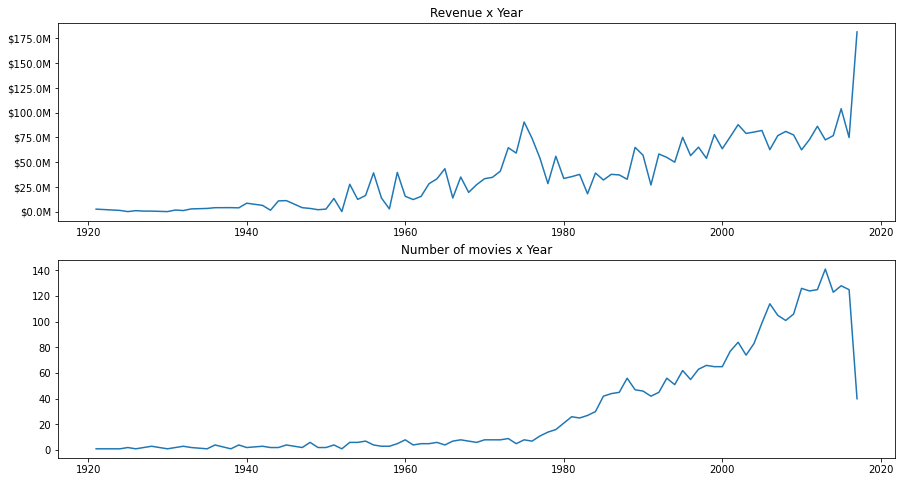

In [29]:
f = plt.figure(figsize = (15,8))
ax1 = f.add_subplot(2,1,1)
ax1.yaxis.set_major_formatter(ut.millions)
ax1.set_title('Revenue x Year')
ax1.plot(movie_year.index, year_revenue_mean)


movie_per_year = train_df[['release_date_year', 'id']].sort_values(by = 'release_date_year').groupby(['release_date_year']).count()

ax2 = f.add_subplot(2,1,2)
ax2.set_title('Number of movies x Year')
ax2.plot(movie_per_year)

**Osservazioni**

Esploro i valori nel dettaglio.

In [30]:
train_df[['id','release_date_year', 'revenue']].sort_values(by = 'revenue')

,id,release_date_year,revenue
347,348,1996,1
1754,1755,1995,1
1917,1918,1925,1
1874,1875,2007,1
695,696,2003,2
...,...,...,...
2322,2323,2011,1123746996
684,685,2017,1262886337
2770,2771,2015,1405403694
1761,1762,2015,1506249360


Osservando meglio i film per cui revenue è 1,2,...   
1 corrisponde a quanti dollari?   
C'è un nesso tra il numero riportato nel dataset e il vero valore dell'incasso?

In [31]:
train_df[['id','release_date_year', 'revenue']].sort_values(by = 'revenue').head(10)

,id,release_date_year,revenue
347,348,1996,1
1754,1755,1995,1
1917,1918,1925,1
1874,1875,2007,1
695,696,2003,2
334,335,2003,3
1541,1542,2014,3
2383,2384,1970,3
2117,2118,2001,4
1346,1347,1955,5


In [32]:
train_df.loc[1874][['title','revenue', 'release_date_year']]

title                Missing
revenue                    1
release_date_year       2007
Name: 1874, dtype: object

True revenue = $1,981,961   
source: https://www.imdb.com/title/tt1133617/

In [33]:
train_df.loc[695][['title','revenue']]

title      Tere Naam
revenue            2
Name: 695, dtype: object

True revenue = ₹24.54 crore   
equivalent of: $3.320.803,50     
source: https://en.wikipedia.org/wiki/Tere_Naam#cite_note-BOI_financials_-_Tere_Naam-1

In [34]:
train_df.loc[2117][['title','revenue']]

title      American Adobo
revenue                 4
Name: 2117, dtype: object

True revenue = $344,992       
Source: https://en.wikipedia.org/wiki/American_Adobo

Quindi ci sono dei film, nel train set, per cui revenue è stato mal riportato.     

**Ricapitolando**: Ci sono valori errati per 'budget' e 'revenue'   
Li sistemo prendendo i dati dalla discussione sulla competizione in Kaggle.

In [35]:
train_df.loc[train_df['id'] == 16,'revenue'] = 192864          # Skinning
train_df.loc[train_df['id'] == 90,'budget'] = 30000000         # Sommersby          
train_df.loc[train_df['id'] == 118,'budget'] = 60000000        # Wild Hogs
train_df.loc[train_df['id'] == 149,'budget'] = 18000000        # Beethoven
train_df.loc[train_df['id'] == 313,'revenue'] = 12000000       # The Cookout 
train_df.loc[train_df['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train_df.loc[train_df['id'] == 464,'budget'] = 20000000        # Parenthood
train_df.loc[train_df['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train_df.loc[train_df['id'] == 513,'budget'] = 930000          # From Prada to Nada
train_df.loc[train_df['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train_df.loc[train_df['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train_df.loc[train_df['id'] == 850,'budget'] = 90000000        # Modern Times
train_df.loc[train_df['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train_df.loc[train_df['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train_df.loc[train_df['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train_df.loc[train_df['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train_df.loc[train_df['id'] == 1542,'budget'] = 1              # All at Once
train_df.loc[train_df['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train_df.loc[train_df['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train_df.loc[train_df['id'] == 1714,'budget'] = 46000000       # The Recruit
train_df.loc[train_df['id'] == 1721,'budget'] = 17500000       # Cocoon
train_df.loc[train_df['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train_df.loc[train_df['id'] == 1885,'budget'] = 12             # In the Cut
train_df.loc[train_df['id'] == 2091,'budget'] = 10             # Deadfall
train_df.loc[train_df['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train_df.loc[train_df['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train_df.loc[train_df['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train_df.loc[train_df['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train_df.loc[train_df['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train_df.loc[train_df['id'] == 2801,'budget'] = 10000000       # Fracture
train_df.loc[train_df['id'] == 335,'budget'] = 2 
train_df.loc[train_df['id'] == 348,'budget'] = 12
train_df.loc[train_df['id'] == 470,'budget'] = 13000000 
train_df.loc[train_df['id'] == 513,'budget'] = 1100000
train_df.loc[train_df['id'] == 640,'budget'] = 6 
train_df.loc[train_df['id'] == 696,'budget'] = 1
train_df.loc[train_df['id'] == 797,'budget'] = 8000000 
train_df.loc[train_df['id'] == 850,'budget'] = 1500000
train_df.loc[train_df['id'] == 1199,'budget'] = 5 
train_df.loc[train_df['id'] == 1282,'budget'] = 9               # Death at a Funeral
train_df.loc[train_df['id'] == 1347,'budget'] = 1
train_df.loc[train_df['id'] == 1755,'budget'] = 2
train_df.loc[train_df['id'] == 1801,'budget'] = 5
train_df.loc[train_df['id'] == 1918,'budget'] = 592 
train_df.loc[train_df['id'] == 2033,'budget'] = 4
train_df.loc[train_df['id'] == 2118,'budget'] = 344 
train_df.loc[train_df['id'] == 2252,'budget'] = 130
train_df.loc[train_df['id'] == 2256,'budget'] = 1 
train_df.loc[train_df['id'] == 2696,'budget'] = 10000000


test_df.loc[test_df['id'] == 6733,'budget'] = 5000000
test_df.loc[test_df['id'] == 3889,'budget'] = 15000000
test_df.loc[test_df['id'] == 6683,'budget'] = 50000000
test_df.loc[test_df['id'] == 5704,'budget'] = 4300000
test_df.loc[test_df['id'] == 6109,'budget'] = 281756
test_df.loc[test_df['id'] == 7242,'budget'] = 10000000
test_df.loc[test_df['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test_df.loc[test_df['id'] == 5591,'budget'] = 4000000        # The Orphanage
test_df.loc[test_df['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test_df.loc[test_df['id'] == 3033,'budget'] = 250 
test_df.loc[test_df['id'] == 3051,'budget'] = 50
test_df.loc[test_df['id'] == 3084,'budget'] = 337
test_df.loc[test_df['id'] == 3224,'budget'] = 4  
test_df.loc[test_df['id'] == 3594,'budget'] = 25  
test_df.loc[test_df['id'] == 3619,'budget'] = 500  
test_df.loc[test_df['id'] == 3831,'budget'] = 3  
test_df.loc[test_df['id'] == 3935,'budget'] = 500  
test_df.loc[test_df['id'] == 4049,'budget'] = 995946 
test_df.loc[test_df['id'] == 4424,'budget'] = 3  
test_df.loc[test_df['id'] == 4460,'budget'] = 8  
test_df.loc[test_df['id'] == 4555,'budget'] = 1200000 
test_df.loc[test_df['id'] == 4624,'budget'] = 30 
test_df.loc[test_df['id'] == 4645,'budget'] = 500 
test_df.loc[test_df['id'] == 4709,'budget'] = 450 
test_df.loc[test_df['id'] == 4839,'budget'] = 7
test_df.loc[test_df['id'] == 3125,'budget'] = 25 
test_df.loc[test_df['id'] == 3142,'budget'] = 1
test_df.loc[test_df['id'] == 3201,'budget'] = 450
test_df.loc[test_df['id'] == 3222,'budget'] = 6
test_df.loc[test_df['id'] == 3545,'budget'] = 38
test_df.loc[test_df['id'] == 3670,'budget'] = 18
test_df.loc[test_df['id'] == 3792,'budget'] = 19
test_df.loc[test_df['id'] == 3881,'budget'] = 7
test_df.loc[test_df['id'] == 3969,'budget'] = 400
test_df.loc[test_df['id'] == 4196,'budget'] = 6
test_df.loc[test_df['id'] == 4221,'budget'] = 11
test_df.loc[test_df['id'] == 4222,'budget'] = 500
test_df.loc[test_df['id'] == 4285,'budget'] = 11
test_df.loc[test_df['id'] == 4319,'budget'] = 1
test_df.loc[test_df['id'] == 4639,'budget'] = 10
test_df.loc[test_df['id'] == 4719,'budget'] = 45
test_df.loc[test_df['id'] == 4822,'budget'] = 22
test_df.loc[test_df['id'] == 4829,'budget'] = 20
test_df.loc[test_df['id'] == 4969,'budget'] = 20
test_df.loc[test_df['id'] == 5021,'budget'] = 40 
test_df.loc[test_df['id'] == 5035,'budget'] = 1 
test_df.loc[test_df['id'] == 5063,'budget'] = 14 
test_df.loc[test_df['id'] == 5119,'budget'] = 2 
test_df.loc[test_df['id'] == 5214,'budget'] = 30 
test_df.loc[test_df['id'] == 5221,'budget'] = 50 
test_df.loc[test_df['id'] == 4903,'budget'] = 15
test_df.loc[test_df['id'] == 4983,'budget'] = 3
test_df.loc[test_df['id'] == 5102,'budget'] = 28
test_df.loc[test_df['id'] == 5217,'budget'] = 75
test_df.loc[test_df['id'] == 5224,'budget'] = 3 
test_df.loc[test_df['id'] == 5469,'budget'] = 20 
test_df.loc[test_df['id'] == 5840,'budget'] = 1 
test_df.loc[test_df['id'] == 5960,'budget'] = 30
test_df.loc[test_df['id'] == 6506,'budget'] = 11 
test_df.loc[test_df['id'] == 6553,'budget'] = 280
test_df.loc[test_df['id'] == 6561,'budget'] = 7
test_df.loc[test_df['id'] == 6582,'budget'] = 218
test_df.loc[test_df['id'] == 6638,'budget'] = 5
test_df.loc[test_df['id'] == 6749,'budget'] = 8 
test_df.loc[test_df['id'] == 6759,'budget'] = 50 
test_df.loc[test_df['id'] == 6856,'budget'] = 10
test_df.loc[test_df['id'] == 6858,'budget'] =  100
test_df.loc[test_df['id'] == 6876,'budget'] =  250
test_df.loc[test_df['id'] == 6972,'budget'] = 1
test_df.loc[test_df['id'] == 7079,'budget'] = 8000000
test_df.loc[test_df['id'] == 7150,'budget'] = 118
test_df.loc[test_df['id'] == 6506,'budget'] = 118
test_df.loc[test_df['id'] == 7225,'budget'] = 6
test_df.loc[test_df['id'] == 7231,'budget'] = 85
test_df.loc[test_df['id'] == 5222,'budget'] = 5
test_df.loc[test_df['id'] == 5322,'budget'] = 90
test_df.loc[test_df['id'] == 5350,'budget'] = 70
test_df.loc[test_df['id'] == 5378,'budget'] = 10
test_df.loc[test_df['id'] == 5545,'budget'] = 80
test_df.loc[test_df['id'] == 5810,'budget'] = 8
test_df.loc[test_df['id'] == 5926,'budget'] = 300
test_df.loc[test_df['id'] == 5927,'budget'] = 4
test_df.loc[test_df['id'] == 5986,'budget'] = 1
test_df.loc[test_df['id'] == 6053,'budget'] = 20
test_df.loc[test_df['id'] == 6104,'budget'] = 1
test_df.loc[test_df['id'] == 6130,'budget'] = 30
test_df.loc[test_df['id'] == 6301,'budget'] = 150
test_df.loc[test_df['id'] == 6276,'budget'] = 100
test_df.loc[test_df['id'] == 6473,'budget'] = 100
test_df.loc[test_df['id'] == 6842,'budget'] = 30

### Categorical Data

Vediamo quali sono le colonne con dati categoriali:

In [36]:
numerical_col = ['id', 'budget', 'popularity', 'runtime', 'revenue', 'log_revenue']
train_df[train_df.columns.difference(numerical_col)].head()

,Keywords,belongs_to_collection,cast,crew,genres,homepage,original_language,overview,production_companies,production_countries,release_date_day,release_date_month,release_date_weekday,release_date_year,spoken_languages,status,tagline,title
0,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'id': 313576, 'name': 'Hot Tub Time Machine ...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...","[{'id': 35, 'name': 'Comedy'}]",NaN,en,"When Lou, who has become the ""father of the In...","[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",20,2,4,2015,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2
1,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'id': 107674, 'name': 'The Princess Diaries ...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,en,Mia Thermopolis is now a college graduate and ...,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",6,8,4,2004,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement
2,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",NaN,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...","[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,en,"Under the direction of a ruthless instructor, ...","[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10,10,4,2014,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash
3,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",NaN,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...","[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",9,3,4,2012,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani
4,NaN,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...","[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,ko,Marine Boy is the story of a former national s...,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",5,2,3,2009,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy


Sembra che alcuni dati siano nel formato dizionario, meglio sistemarli...

In [37]:
series_cols = ['belongs_to_collection', 'genres','production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']
#Converto i dati nel vero formato dizionario
for df in [train_df, test_df]:
    for column in series_cols:
        df[column] = df[column].apply(lambda s: [] if pd.isnull(s) else eval(s))

In [38]:
train_df.head()

,id,belongs_to_collection,budget,genres,homepage,original_language,overview,popularity,production_companies,production_countries,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,release_date_year,release_date_weekday,release_date_month,release_date_day
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,en,"When Lou, who has become the ""father of the In...",6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015,4,2,20
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,en,Mia Thermopolis is now a college graduate and ...,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004,4,8,6
2,3,[],3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,en,"Under the direction of a ruthless instructor, ...",64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014,4,10,10
3,4,[],1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,hi,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012,4,3,9
4,5,[],0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,ko,Marine Boy is the story of a former national s...,1.148070,[],"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009,3,2,5


Esamino ogni colonna nel dettaglio per cercare le migliori feature da utilizzare per la predizione.

#### 'belongs_to_collection'

Dalla tabella delle informazioni sul dataset che ho creato all'inizio, noto che mancano molte informazioni per questa colonna.

In [39]:
train_df['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

Da questi dati posso ricavare come feature 'has_collection', mettendo 1 se il film appartiene ad una collezione e 0 altrimenti.

In [40]:
for df in [train_df, test_df]:
    df['has_collection'] = df['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)
    df.drop(columns = 'belongs_to_collection', inplace=True)

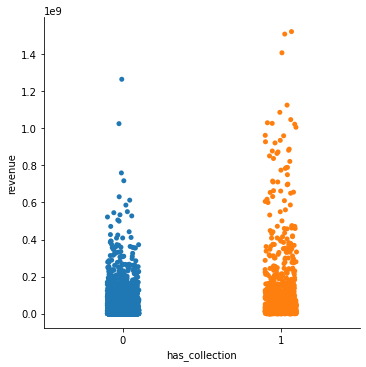

In [41]:
sns.catplot(x = 'has_collection', y = 'revenue', data=train_df)

#### 'homepage'

Quanti sono i dati mancanti per la colonna 'homepage'?

In [42]:
train_df['homepage'].apply(lambda v: pd.isnull(v) == True).sum()

2054

Di nuovo, da questi dati posso ricavare come feature 'has_homepage', mettendo 1 se al film è associata una homepage e 0 altrimenti.

In [43]:
for df in [train_df, test_df]:
    df['has_homepage'] = df['homepage'].apply(lambda x: 1 if pd.isnull(x) == False else 0)
    df.drop(columns = 'homepage', inplace=True)

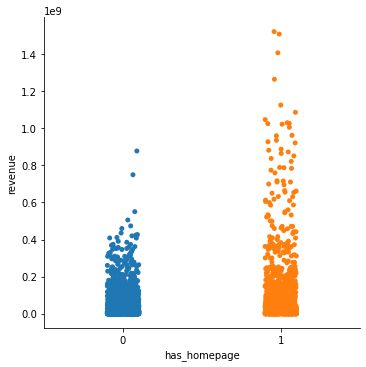

In [44]:
sns.catplot(x = 'has_homepage', y = 'revenue', data=train_df)

#### 'original_language'

Per chiarezza creo un grafico per visualizzare l'impatto della lingua originale sull'incasso del film.

<AxesSubplot:xlabel='original_language', ylabel='revenue'>

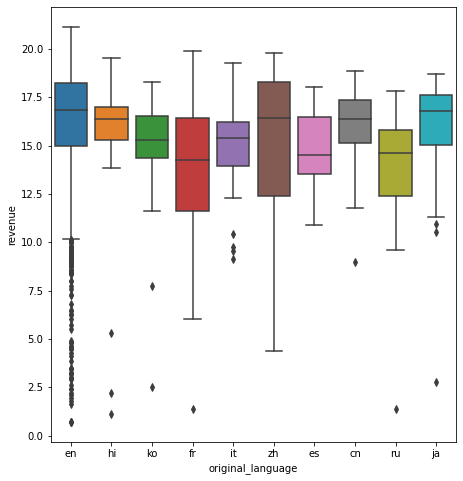

In [45]:
plt.figure(figsize = (16, 8))
plt.subplot(1, 2, 1)
data = train_df.loc[train_df['original_language'].isin(train_df['original_language'].value_counts().head(10).index)]
y = np.log1p(train_df['revenue'])
sns.boxplot(x = 'original_language', y = y, data = data)

In [46]:
top_original_language = Counter(train_df['original_language']).most_common(17)
top_original_language

[('en', 2575),
 ('fr', 78),
 ('ru', 47),
 ('es', 43),
 ('hi', 42),
 ('ja', 37),
 ('it', 24),
 ('ko', 20),
 ('cn', 20),
 ('zh', 19),
 ('de', 18),
 ('ta', 16),
 ('sv', 8),
 ('nl', 6),
 ('pt', 6),
 ('fa', 5),
 ('da', 5)]

Estraggo solo le 5 lingue con la media degli incassi più alta, le quali sono originali per almeno 5 film nel dataset.

In [47]:
lang = [x[0] for x in top_original_language]
unique_names = pd.Series(lang).unique()
dic = {}
for l in unique_names:
    language = train_df['original_language'].apply(lambda x: l in x)
    dic[l] = train_df[language]['revenue'].mean()
    
##top 5 lingue originali con la media degli incassi più alta
l_mean_revenue = pd.DataFrame.from_dict(dic, orient='index', columns = ['mean_revenue']).reset_index().rename(columns = {'index':'language'})
l_mean_revenue = l_mean_revenue.nlargest(5, 'mean_revenue')
list_top_languages = list(l_mean_revenue['language'])
l_mean_revenue['mean_revenue'] = l_mean_revenue['mean_revenue'].apply(lambda x:  '{0:.5f}'.format(x))
print(l_mean_revenue)

for lang in list_top_languages: ## one hot encoding
    train_df['orig_lang_' + lang] = train_df['original_language'].apply(lambda x: 1 if x == lang else 0)
    test_df['orig_lang_' + lang] = test_df['original_language'].apply(lambda x: 1 if x == lang else 0)

  language    mean_revenue
0       en  74614465.27184
9       zh  70376369.15789
5       ja  30651798.81081
8       cn  29772885.25000
4       hi  25346368.73810


In [48]:
for df in [train_df, test_df]:
    df.drop(columns = 'original_language', inplace=True)

#### 'overview'

All'inizio ho pensato che fosse una buona idea creare delle feature facendo one hot encoding sulle parole più frequenti tra tutte le overview, però così facendo avrei creato molte colonne e questo potrebbe essere un problema.  
Per questo mi limito a creare una feature per la lunghezza della overview per ogni film e, per le parole più frequenti, mi baso unicamente sulle keywords.

In [49]:
for df in [train_df, test_df]:
    df['overview'] = df['overview'].fillna("")
    df['overview_word_count'] = df['overview'].str.split().str.len()
    df.drop(columns = 'overview', inplace=True)

#### 'tagline'

Faccio la stessa cosa per 'tagline'.

In [50]:
for df in [train_df, test_df]:
    df['tagline'] = df['tagline'].fillna("")
    df['tagline_word_count'] = df['tagline'].str.split().str.len()
    df.drop(columns = 'tagline', inplace=True)

#### 'status'

Da una prima esplorazione del dataset sembrava che molti film avessero come stato 'released', quindi vediamo effettivamente quanti film non lo hanno:

In [51]:
 train_df.query('status != "Released" ')

,id,budget,genres,popularity,production_companies,production_countries,runtime,spoken_languages,status,title,Keywords,cast,crew,revenue,release_date_year,release_date_weekday,release_date_month,release_date_day,has_collection,has_homepage,orig_lang_en,orig_lang_zh,orig_lang_ja,orig_lang_cn,orig_lang_hi,overview_word_count,tagline_word_count
609,610,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",5.121309,[],[],71.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...",Rumored,The Swan Princess: Escape from Castle Mountain,"[{'id': 3071, 'name': 'prince'}, {'id': 4456, ...","[{'cast_id': 2, 'character': 'Odette (voice)',...","[{'credit_id': '52fe488bc3a36847f816cfd3', 'de...",273644,1997,2,1,1,1,0,1,0,0,0,0,49,10
1007,1008,0,"[{'id': 35, 'name': 'Comedy'}]",0.007877,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",60.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,Billy Gardell: Halftime,[],"[{'cast_id': 9, 'character': 'Himself', 'credi...","[{'credit_id': '52fe4be1c3a368484e19d265', 'de...",60,2011,5,2,5,0,0,1,0,0,0,0,31,0
1216,1217,0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",10.273979,"[{'name': 'Atlantic Entertainment Group', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Rumored,Extremities,"[{'id': 2483, 'name': 'nudity'}, {'id': 2539, ...","[{'cast_id': 1, 'character': 'Marjorie', 'cred...","[{'credit_id': '582cca1c925141780b00259f', 'de...",13418091,1986,4,8,22,0,0,1,0,0,0,0,101,12
1618,1619,891000,"[{'id': 99, 'name': 'Documentary'}]",0.179246,[],"[{'iso_3166_1': 'CA', 'name': 'Canada'}]",89.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Rumored,A Place Called Chiapas,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 1, 'character': 'Himself', 'credi...","[{'credit_id': '57b4f7619251417287000dfc', 'de...",229000,1998,4,2,20,0,0,1,0,0,0,0,134,6


Solo 4 film su 3000 non ha uno status, quindi lo elimino.

In [52]:
for df in [train_df, test_df]:
    df.drop(columns = 'status', inplace=True)

#### 'title'

Eseguo lo stesso procedimento che ho fatto per 'overview' e 'tagline':  

In [53]:
for df in [train_df, test_df]:
    df['title'] = df['title'].fillna("")
    df['title_word_count'] = df['title'].str.split().str.len()
    df.drop(columns = 'title', inplace=True)

Posso eliminare anche 'id'

In [54]:
for df in [train_df, test_df]:
    df.drop(columns = 'id', inplace=True)

**Ultimi ma non meno importanti:**

### Dictionary Data

Estraggo le feature più importanti dalle colonne di tipo dizionario:  
- #### 'genres'

In [55]:
for genres in train_df['genres'][:5]:
    print(genres)

[{'id': 35, 'name': 'Comedy'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
[{'id': 18, 'name': 'Drama'}]
[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


In [56]:
for df in [train_df, test_df]:
    df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values
    df['num_gen'] = df['genres'].apply(lambda x: len(x) if x != {} else 0)

In [57]:
list_genres = Counter([i for j in train_df['genres'] for i in j]).most_common()
list_genres

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

Controllo se i generi sono gli stessi per test_df

In [58]:
list_genres_test = Counter([i for j in test_df['genres'] for i in j]).most_common()
list_genres_test

[('Drama', 2145),
 ('Comedy', 1577),
 ('Thriller', 1080),
 ('Action', 994),
 ('Romance', 864),
 ('Adventure', 677),
 ('Crime', 615),
 ('Science Fiction', 454),
 ('Horror', 434),
 ('Family', 415),
 ('Fantasy', 396),
 ('Mystery', 325),
 ('Animation', 241),
 ('Music', 167),
 ('History', 163),
 ('War', 143),
 ('Documentary', 134),
 ('Western', 74),
 ('Foreign', 53)]

Dal momento che 'TV movie' compare solo come genere di un unico film nel train set, decido di ometterlo come feature.

In [59]:
## one hot encoding
mlb = MultiLabelBinarizer()
train_df = train_df.join(pd.DataFrame(mlb.fit_transform(train_df.pop('genres')),
                          columns=mlb.classes_,
                          index=train_df.index))
train_df.drop(columns = 'TV Movie', inplace=True)
test_df = test_df.join(pd.DataFrame(mlb.fit_transform(test_df.pop('genres')),
                          columns=mlb.classes_,
                          index=test_df.index))

In [60]:
train_df.shape

(3000, 44)

In [61]:
test_df.shape

(4398, 43)

- #### 'production_companies'

In [62]:
for p_comp in train_df['production_companies'][:5]:
    print(p_comp)

[{'name': 'Paramount Pictures', 'id': 4}, {'name': 'United Artists', 'id': 60}, {'name': 'Metro-Goldwyn-Mayer (MGM)', 'id': 8411}]
[{'name': 'Walt Disney Pictures', 'id': 2}]
[{'name': 'Bold Films', 'id': 2266}, {'name': 'Blumhouse Productions', 'id': 3172}, {'name': 'Right of Way Films', 'id': 32157}]
[]
[]


In [63]:
for df in [train_df, test_df]:
    df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else 0).values
    df['num_prod_comp'] = df['production_companies'].apply(lambda x: len(x) if x != {} else 0)

In [64]:
## case di produzione cinematografica che hanno prodotto almeno 20 film
list_of_top_pcomp = Counter([i for j in train_df['production_companies'] for i in j]).most_common(35)
list_of_top_pcomp

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23),
 ('Castle Rock Entertainment', 21),
 ('Epsilon Motion Pictures', 21),
 ('Morgan Creek Productions', 21),
 ('Original Film', 21),
 ('Focus 

In [65]:
pcomp = [x[0] for x in list_of_top_pcomp]
unique_names = pd.Series(pcomp).unique()
dic = {}
for n in unique_names:
    pcomp = train_df['production_companies'].apply(lambda x: n in x)
    dic[n] = train_df[pcomp]['revenue'].mean()
    
## top 5 compagnie di produzione con la media degli incassi più alta e che hanno prodotto almeno 20 film
pcomp_mean_revenue = pd.DataFrame.from_dict(dic, orient='index', columns = ['mean_revenue']).reset_index().rename(columns = {'index':'production_companies'})
pcomp_mean_revenue = pcomp_mean_revenue.nlargest(5, 'mean_revenue') 
list_top_pcomps = list(pcomp_mean_revenue['production_companies'])
pcomp_mean_revenue['mean_revenue'] = pcomp_mean_revenue['mean_revenue'].apply(lambda x:  '{0:.5f}'.format(x))
print(pcomp_mean_revenue)

for pcomp in list_top_pcomps: ## one hot encoding
    train_df['pcomp_' + pcomp] = train_df['production_companies'].apply(lambda x: 1 if pcomp in x else 0)
    test_df['pcomp_' + pcomp] = test_df['production_companies'].apply(lambda x: 1 if pcomp in x else 0)

    production_companies     mean_revenue
8   Walt Disney Pictures  303777082.54839
28  Amblin Entertainment  230780010.26087
33         Original Film  227934116.14286
23        DreamWorks SKG  187110073.44444
18    Dune Entertainment  168699729.36667


In [66]:
for df in [train_df, test_df]:
    df.drop(columns = 'production_companies', inplace=True)

- #### 'production_countries'

In [67]:
train_df['production_countries'].head()

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3              [{'iso_3166_1': 'IN', 'name': 'India'}]
4        [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
Name: production_countries, dtype: object

In [68]:
for df in [train_df, test_df]:
    df['production_countries'] = df['production_countries'].apply(lambda x: [i['iso_3166_1'] for i in x] if x != {} else 0).values
    df['num_prod_countries'] = df['production_countries'].apply(lambda x: len(x) if x != {} else 0)

In [69]:
## paesi in cui sono stati prodotti almeno 15 film
list_of_top_pcountries = Counter([i for j in train_df['production_countries'] for i in j]).most_common(20)
list_of_top_pcountries

[('US', 2282),
 ('GB', 380),
 ('FR', 222),
 ('DE', 167),
 ('CA', 120),
 ('IN', 81),
 ('IT', 64),
 ('JP', 61),
 ('AU', 61),
 ('RU', 58),
 ('ES', 54),
 ('CN', 42),
 ('HK', 42),
 ('IE', 23),
 ('BE', 23),
 ('KR', 22),
 ('MX', 19),
 ('SE', 18),
 ('NZ', 17),
 ('NL', 15)]

In [70]:
pcountr = [x[0] for x in list_of_top_pcountries]
unique_names = pd.Series(pcountr).unique()
dic = {}
for n in unique_names:
    pcountr = train_df['production_countries'].apply(lambda x: n in x)
    dic[n] = train_df[pcountr]['revenue'].mean()
    
## top 5 paesi di produzione con la media degli incassi più alta e in cui sono stati prodotti almeno 15 film
pcountr_mean_revenue = pd.DataFrame.from_dict(dic, orient='index', columns=['mean_revenue']).reset_index().rename(columns={'index':'production_countries'})
pcountr_mean_revenue = pcountr_mean_revenue.nlargest(5, 'mean_revenue') 
list_top_pcountrs = list(pcountr_mean_revenue['production_countries'])
pcountr_mean_revenue['mean_revenue'] = pcountr_mean_revenue['mean_revenue'].apply(lambda x:  '{0:.5f}'.format(x))
print(pcountr_mean_revenue)

for pcountr in list_top_pcountrs: ## one hot encoding
    train_df['pcountr_' + pcountr] = train_df['production_countries'].apply(lambda x: 1 if pcountr in x else 0)
    test_df['pcountr_' + pcountr] = test_df['production_countries'].apply(lambda x: 1 if pcountr in x else 0)

   production_countries     mean_revenue
18                   NZ  308559228.58824
0                    US   81908746.95180
4                    CA   77107964.00000
3                    DE   76163831.01198
11                   CN   75239181.61905


In [71]:
for df in [train_df, test_df]:
    df.drop(columns = 'production_countries', inplace=True)

- #### 'spoken_languages'

In [72]:
for lang in train_df['spoken_languages'][:5]:
    print(lang)

[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'hi', 'name': 'हिन्दी'}]
[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]


In [73]:
for df in [train_df, test_df]:
    df['spoken_languages'] = df['spoken_languages'].apply(lambda x: [i['iso_639_1'] for i in x] if x != {} else 0).values
    df['num_lang'] = df['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)

In [74]:
## lingue che si parlano in almeno 10 film
list_of_top_lang = Counter([i for j in train_df['spoken_languages'] for i in j]).most_common(27)
list_of_top_lang

[('en', 2618),
 ('fr', 288),
 ('es', 239),
 ('de', 169),
 ('ru', 152),
 ('it', 124),
 ('ja', 89),
 ('zh', 68),
 ('hi', 56),
 ('pt', 43),
 ('ar', 40),
 ('ko', 37),
 ('cn', 36),
 ('ta', 27),
 ('pl', 25),
 ('hu', 24),
 ('la', 23),
 ('sv', 22),
 ('th', 22),
 ('cs', 20),
 ('he', 15),
 ('el', 15),
 ('tr', 13),
 ('da', 13),
 ('nl', 10),
 ('fa', 10),
 ('vi', 10)]

In [75]:
lang = [x[0] for x in list_of_top_lang]
unique_names = pd.Series(lang).unique()
dic = {}
for n in unique_names:
    language = train_df['spoken_languages'].apply(lambda x: n in x)
    dic[n] = train_df[language]['revenue'].mean()
    
## top 5 lingue con la media degli incassi più alta e che si parlano in almeno 10 film
l_mean_revenue = pd.DataFrame.from_dict(dic, orient = 'index', columns = ['mean_revenue']).reset_index().rename(columns = {'index':'spoken_languages'})
l_mean_revenue = l_mean_revenue.nlargest(5, 'mean_revenue')
list_top_languages = list(l_mean_revenue['spoken_languages'])
l_mean_revenue['mean_revenue'] = l_mean_revenue['mean_revenue'].apply(lambda x:  '{0:.5f}'.format(x))
print(l_mean_revenue)

for lang in list_top_languages: ## one hot encoding
    train_df['lang_' + lang] = train_df['spoken_languages'].apply(lambda x: 1 if lang in x else 0)
    test_df['lang_' + lang] = test_df['spoken_languages'].apply(lambda x: 1 if lang in x else 0)

   spoken_languages     mean_revenue
16               la  163693786.73913
18               th  135134897.36364
21               el  127700392.93333
7                zh  102015496.51471
10               ar  101855598.20000


In [76]:
for df in [train_df, test_df]:
    df.drop(columns = 'spoken_languages', inplace=True)

- #### 'Keywords'

In [77]:
for kw in train_df['Keywords'][:5]:
    print(kw)

[{'id': 4379, 'name': 'time travel'}, {'id': 9663, 'name': 'sequel'}, {'id': 11830, 'name': 'hot tub'}, {'id': 179431, 'name': 'duringcreditsstinger'}]
[{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]
[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'name': 'obsession'}, {'id': 1640, 'name': 'conservatory'}, {'id': 2176, 'name': 'music teacher'}, {'id': 14512, 'name': 'new york city'}, {'id': 14819, 'name': 'violence'}, {'id': 33896, 'name': 'montage'}, {'id': 156823, 'name': 'drummer'}, {'id': 170418, 'name': 'public humiliation'}, {'id': 176095, 'name': 'jazz band'}, {'id': 206298, 'name': 'young adult'}, {'id': 207739, 'name': 'music school'}]
[{'id': 10092, 'name': 'mystery'}, {'id': 10540, 'name': 'bollywood'}, {'id': 11734, 'name': 'police corruption'}, {'id': 14536, 'name': 'crime'}, {'id': 14636, 'name': 'india'}, {'id': 208364, 'name': 'missing husband'}, {'id': 220935, 'name': 'nerve gas'

In [78]:
for df in [train_df, test_df]:
    df['Keywords'] = df['Keywords'].apply(lambda x: [i['name'] for i in x] if x != {} else 0).values
    df['num_keywords'] = df['Keywords'].apply(lambda x: len(x) if x != {} else 0)

In [79]:
## keywords che sono state usate almeno 40 volte
list_of_top_kw = Counter([i for j in train_df['Keywords'] for i in j]).most_common(32)
list_of_top_kw

[('woman director', 175),
 ('independent film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based on novel', 111),
 ('violence', 87),
 ('sport', 82),
 ('biography', 77),
 ('aftercreditsstinger', 75),
 ('dystopia', 73),
 ('revenge', 73),
 ('friendship', 72),
 ('sex', 71),
 ('suspense', 67),
 ('sequel', 66),
 ('love', 64),
 ('police', 64),
 ('teenager', 61),
 ('nudity', 57),
 ('female nudity', 53),
 ('drug', 52),
 ('prison', 50),
 ('musical', 49),
 ('high school', 49),
 ('los angeles', 48),
 ('new york', 47),
 ('family', 45),
 ('father son relationship', 44),
 ('kidnapping', 41),
 ('investigation', 41),
 ('wedding', 40),
 ('3d', 40)]

In [80]:
kw = [x[0] for x in list_of_top_kw]
unique_names = pd.Series(kw).unique()
dic = {}
for n in unique_names:
    language = train_df['Keywords'].apply(lambda x: n in x)
    dic[n] = train_df[language]['revenue'].mean()
    
## top 10 keywords con la media degli incassi più alta e che sono state usate almeno 40 volte
kw_mean_revenue = pd.DataFrame.from_dict(dic, orient = 'index', columns = ['mean_revenue']).reset_index().rename(columns = {'index':'keywords'})
kw_mean_revenue = kw_mean_revenue.nlargest(10, 'mean_revenue') 
list_top_keywords = list(kw_mean_revenue['keywords'])
kw_mean_revenue['mean_revenue'] = kw_mean_revenue['mean_revenue'].apply(lambda x:  '{0:.5f}'.format(x))
print(kw_mean_revenue)

for kw in list_top_keywords: ## one hot encoding
    train_df['kw_' + kw] = train_df['Keywords'].apply(lambda x: 1 if kw in x else 0)
    test_df['kw_' + kw] = test_df['Keywords'].apply(lambda x: 1 if kw in x else 0)

                   keywords     mean_revenue
31                       3d  375249570.52500
8       aftercreditsstinger  217725899.98667
14                   sequel  205682018.27273
2      duringcreditsstinger  183936420.39552
9                  dystopia  134917413.16438
4            based on novel  115681069.42342
27  father son relationship  101996587.15909
30                  wedding  100758282.95000
25                 new york   90808908.76596
24              los angeles   86396287.41667


In [81]:
for df in [train_df, test_df]:
    df.drop(columns = 'Keywords', inplace=True)

- #### 'cast'

In [82]:
for cast in train_df['cast'][:2]:
    print(cast)

[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character'

In [83]:
for df in [train_df, test_df]:
    df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if x != {} else 0).values
    df['num_cast'] = df['cast'].apply(lambda x: len(x) if x != {} else 0)

In [84]:
 ## attori che hanno recitato in almeno 20 film
list_of_top_actor_names = Counter([i for j in train_df['cast'] for i in j]).most_common(29)
list_of_top_actor_names

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21),
 ('Jason Statham', 21),
 ('Keith David', 21),
 ('John Goodman', 21),
 ('Mel Gibson', 21),
 ('Sigourney Weaver', 21),
 ('Frank Welker', 20),
 ('Michael Caine', 20),
 ('George Clooney', 20),
 ('Denzel Washington', 20),
 ('Robert Duvall', 20),
 ('Ed Harris', 20),
 ('Dennis Quaid', 20),
 ('Richard Jenkins', 20),
 ('Matt Damon', 20)]

In [85]:
actor = [x[0] for x in list_of_top_actor_names]
unique_names = pd.Series(actor).unique()
dic = {}
for n in unique_names:
    actor = train_df['cast'].apply(lambda x: n in x)
    dic[n] = train_df[actor]['revenue'].mean()

## top 10 attori con la media degli incassi più alta e che hanno recitato in almeno 20 film
kw_mean_revenue = pd.DataFrame.from_dict(dic, orient='index', columns = ['mean_revenue']).reset_index().rename(columns = {'index':'actors'})
kw_mean_revenue = kw_mean_revenue.nlargest(10, 'mean_revenue')
list_top_actors = list(kw_mean_revenue['actors'])
kw_mean_revenue['mean_revenue'] = kw_mean_revenue['mean_revenue'].apply(lambda x:  '{0:.5f}'.format(x))
print(kw_mean_revenue)

for actor in list_top_actors: ## one hot encoding
    train_df['actor_' + actor] = train_df['cast'].apply(lambda x: 1 if actor in x else 0)
    test_df['actor_' + actor] = test_df['cast'].apply(lambda x: 1 if actor in x else 0)

                actors     mean_revenue
0    Samuel L. Jackson  290182222.33333
20        Frank Welker  254493202.84211
8        John Turturro  184732506.37500
14  Sylvester Stallone  165665154.09524
15       Jason Statham  163019915.04762
25           Ed Harris  153885842.60000
21       Michael Caine  151742341.75000
22      George Clooney  151651751.65000
19    Sigourney Weaver  147324772.80952
12         Owen Wilson  139404534.81818


In [86]:
for df in [train_df, test_df]:
    df.drop(columns = 'cast', inplace=True)

In [87]:
train_df.shape

(3000, 79)

In [88]:
test_df.shape

(4398, 78)

- #### 'crew'

In [89]:
for crew in train_df['crew'][:2]:
    print(crew)

[{'credit_id': '59ac067c92514107af02c8c8', 'department': 'Directing', 'gender': 0, 'id': 1449071, 'job': 'First Assistant Director', 'name': 'Kelly Cantley', 'profile_path': None}, {'credit_id': '52fe4ee7c3a36847f82afad7', 'department': 'Directing', 'gender': 2, 'id': 3227, 'job': 'Director', 'name': 'Steve Pink', 'profile_path': '/myHOgo8mQSCiCAZNGMRdHVr03jr.jpg'}, {'credit_id': '5524ed25c3a3687ded000d88', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Writer', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed2d925141720c001128', 'department': 'Writing', 'gender': 2, 'id': 347335, 'job': 'Characters', 'name': 'Josh Heald', 'profile_path': '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'}, {'credit_id': '5524ed3d92514166c1004a5d', 'department': 'Production', 'gender': 2, 'id': 57822, 'job': 'Producer', 'name': 'Andrew Panay', 'profile_path': None}, {'credit_id': '5524ed4bc3a3687df3000dd2', 'department': 'Production', 'gender': 0, 'id': 1451

In [90]:
list_of_dep = list(train_df['crew'].apply(lambda x: [i['department'] for i in x] if x != {} else []).values)
Counter([i for j in list_of_dep for i in j]).most_common()

[('Production', 15887),
 ('Sound', 9319),
 ('Art', 8069),
 ('Crew', 7315),
 ('Writing', 6567),
 ('Costume & Make-Up', 6156),
 ('Camera', 5424),
 ('Directing', 4954),
 ('Editing', 4508),
 ('Visual Effects', 3591),
 ('Lighting', 1303),
 ('Actors', 4)]

In [91]:
for df in [train_df, test_df]:
    df['crew_num'] = df['crew'].apply(lambda x: len(x) if x != {} else 0) ## numero di componenti della crew
    df['genders_0_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 0])) ## non specificato
    df['female_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 1])) ## donna
    df['male_crew'] = df['crew'].apply(lambda x: sum([1 for i in x if i['gender'] == 2])) ## uomo

In [92]:
## Queste sono le top 15 persone che hanno lavorato di più nei film, raggruppate per lavoro.
## Penso sia meglio se le raggruppo per dipartimento.
# list_of_names = list(train_df['crew'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
# list_of_top_names = Counter([i for j in list_of_names for i in j]).most_common(15)
# list_of_top_names

##### Directing

In [93]:
for df in [train_df, test_df]:
    df['all_dir'] = df['crew'].apply(lambda x: [i['name'] for i in x if i['department'] == 'Directing'] if x != {} else []).values

In [94]:
count_of_directors = Counter([i for j in list(train_df['all_dir']) for i in j])
df_count_directors = pd.DataFrame.from_dict(count_of_directors, orient='index').reset_index().rename(columns={'index':'director', 0:'count'})
df_count_directors = df_count_directors.sort_values('count', ascending=False)
df_count_directors

,director,count
238,Karen Golden,13
526,Clint Eastwood,11
214,Kerry Lyn McKissick,11
200,Ron Howard,11
29,Steven Spielberg,10
...,...,...
1400,Mark Sandrich,1
1401,Sandy King,1
1402,Kazuaki Kiriya,1
1404,Shinji Higuchi,1


In [95]:
count_of_directors = Counter([i for j in list(test_df['all_dir']) for i in j])
df_count_directors = pd.DataFrame.from_dict(count_of_directors, orient='index').reset_index().rename(columns={'index':'director', 0:'count'})
df_count_directors = df_count_directors.sort_values('count', ascending=False)
df_count_directors

,director,count
449,Steven Spielberg,20
1002,Clint Eastwood,18
215,Woody Allen,18
98,Ridley Scott,16
271,Alfred Hitchcock,13
...,...,...
1957,Radmila Jovancicevic,1
1958,Antony J. Bowman,1
1960,Elliot Silverstein,1
1961,Deb Hagan,1


Non ci sono registi che hanno girato un numero di film significativo, quindi creerei delle feature poco importanti.

In [96]:
df_top_directors =  df_count_directors[df_count_directors['count'] > 4] ## registi che hanno lavorato a più di 10 film
unique_names = list(df_top_directors['director'])

dic = {}
for n in unique_names:
    director = train_df['all_dir'].apply(lambda x: n in x)
    dic[n] = train_df[director]['revenue'].mean()
    
## top 10 registi con la media degli incassi più alta e che hanno lavorato a  più di 10 film
d_mean_revenue = pd.DataFrame.from_dict(dic, orient='index', columns = ['mean_revenue']).reset_index().rename(columns = {'index':'director'})
d_mean_revenue = d_mean_revenue.nlargest(10, 'mean_revenue') 
list_top_directors = list(d_mean_revenue['director'])
d_mean_revenue['mean_revenue'] = d_mean_revenue['mean_revenue'].apply(lambda x:  '{0:.5f}'.format(x))
print(d_mean_revenue)

for d in list_top_directors: ## one hot encoding
    train_df['dir_' + d] = train_df['all_dir'].apply(lambda x: 1 if d in x else 0)
    test_df['dir_' + d] = test_df['all_dir'].apply(lambda x: 1 if d in x else 0)

               director     mean_revenue
34          Anna Worley  933959197.00000
220     Alfonso Cuar√≥n  716392705.00000
120         Zack Snyder  662845518.00000
82         Harald Kraut  622052149.00000
176         Michael Bay  488344056.62500
8    Ana Maria Quintana  487500802.42857
193         Rob Minkoff  485266021.00000
151      Gore Verbinski  471568411.50000
63           Rick Moore  442500920.40000
0      Steven Spielberg  417390522.90000


In [97]:
for df in [train_df, test_df]:
    df.drop(columns = 'all_dir', inplace=True)

##### Production

In [98]:
list_of_prod = list(train_df['crew'].apply(lambda x: [i['name'] for i in x if i['department'] == 'Production'] if x != {} else []).values)
list_of_top_prod = Counter([i for j in list_of_prod for i in j]).most_common(31) ## hanno contribuito ad almeno 20 film
list_of_top_prod

[('Avy Kaufman', 50),
 ('Deborah Aquila', 40),
 ('Mary Vernieu', 38),
 ('Francine Maisler', 35),
 ('Tricia Wood', 35),
 ('Kerry Barden', 32),
 ('Bob Weinstein', 30),
 ('Harvey Weinstein', 30),
 ('Janet Hirshenson', 30),
 ('Jane Jenkins', 29),
 ('John Papsidera', 28),
 ('Billy Hopkins', 27),
 ('Mindy Marin', 27),
 ('Sarah Finn', 26),
 ('Neal H. Moritz', 26),
 ('Tim Bevan', 26),
 ('Scott Rudin', 25),
 ('Arnon Milchan', 25),
 ('Eric Fellner', 25),
 ('Bruce Berman', 25),
 ('Steven Spielberg', 25),
 ('Suzanne Smith', 24),
 ('Amanda Mackey', 24),
 ('Denise Chamian', 22),
 ('Randi Hiller', 22),
 ('Cathy Sandrich', 22),
 ('Joel Silver', 22),
 ('Roger Birnbaum', 21),
 ('Brian Grazer', 21),
 ('Ronna Kress', 20),
 ('Gary Barber', 20)]

In [99]:
for df in [train_df, test_df]:
    df['all_prod'] = df['crew'].apply(lambda x: [i['name'] for i in x if i['department'] == 'Production'] if x != {} else []).values

In [100]:
prod = [x[0] for x in list_of_top_prod]
unique_names = pd.Series(prod).unique()
dic = {}
for n in unique_names:
    prod = train_df['all_prod'].apply(lambda x: n in x)
    dic[n] = train_df[prod]['revenue'].mean()
    
## top 10 produttori con la media degli incassi più alta e che hanno contribuito ad almeno 20 film
prod_mean_revenue = pd.DataFrame.from_dict(dic, orient = 'index', columns = ['mean_revenue']).reset_index().rename(columns = {'index':'productors'})
prod_mean_revenue = prod_mean_revenue.nlargest(10, 'mean_revenue') 
list_top_actors = list(prod_mean_revenue['productors'])
prod_mean_revenue['mean_revenue'] = prod_mean_revenue['mean_revenue'].apply(lambda x:  '{0:.5f}'.format(x))
print(prod_mean_revenue)

for prod in list_top_actors: ## one hot encoding
    train_df['prod_' + prod] = train_df['all_prod'].apply(lambda x: 1 if prod in x else 0)
    test_df['prod_' + prod] = test_df['all_prod'].apply(lambda x: 1 if prod in x else 0)

          productors     mean_revenue
13        Sarah Finn  321927457.24000
23    Denise Chamian  249449655.77273
20  Steven Spielberg  247456500.40000
14    Neal H. Moritz  205106778.92308
8   Janet Hirshenson  193387514.43333
9       Jane Jenkins  188347625.89655
19      Bruce Berman  170024873.08000
24      Randi Hiller  167842672.28571
29       Ronna Kress  166784772.80000
10    John Papsidera  140751883.89286


In [101]:
for df in [train_df, test_df]:
    df.drop(columns = 'all_prod', inplace=True)

##### Writing

In [102]:
for df in [train_df, test_df]:
    df['all_writ'] = df['crew'].apply(lambda x: [i['name'] for i in x if i['department'] == 'Writing'] if x != {} else []).values

In [103]:
count_of_writers = Counter([i for j in list(train_df['all_writ']) for i in j])
df_count_writers = pd.DataFrame.from_dict(count_of_writers, orient = 'index').reset_index().rename(columns = {'index':'writers', 0:'count'})
df_count_writers = df_count_writers.sort_values('count', ascending = False)
df_count_writers

,writers,count
35,Luc Besson,17
130,Ian Fleming,16
1015,Stephen King,14
17,Sylvester Stallone,14
1521,David S. Goyer,11
...,...,...
1914,Dan Schneider,1
1915,Elisa Briganti,1
1916,Jos√© Truchado,1
1917,Jeff Tremaine,1


Come per i registi, anche il numero di film a cui ha contribuito ciascun sceneggiatore è poco significativo.

In [104]:
df_top_writers =  df_count_writers[df_count_writers['count'] > 5] ## scrittori che hanno scritto più di 5 film
unique_names = list(df_top_writers['writers'])

dic={}
for n in unique_names:
    writer = train_df['all_writ'].apply(lambda x: n in x)
    dic[n] = train_df[writer]['revenue'].mean()
    
## top 10 scrittori con la media degli incassi più alta e che hanno scritto più di 5 film
w_mean_revenue = pd.DataFrame.from_dict(dic, orient='index', columns=['mean_revenue']).reset_index().rename(columns={'index':'writers'})
w_mean_revenue = w_mean_revenue.nlargest(10, 'mean_revenue') 
list_top_writers = list(w_mean_revenue['writers'])
w_mean_revenue['mean_revenue'] = w_mean_revenue['mean_revenue'].apply(lambda x:  '{0:.5f}'.format(x))
print(w_mean_revenue)

for w in list_top_writers: ## one hot encoding
    train_df['writ_' + w] = train_df['all_writ'].apply(lambda x: 1 if w in x else 0)
    test_df['writ_' + w] = test_df['all_writ'].apply(lambda x: 1 if w in x else 0)

            writers     mean_revenue
53  Philippa Boyens  736780819.66667
22     Terry Rossio  673875343.40000
27      Ted Elliott  673875343.40000
20    Peter Jackson  635720590.57143
24       Fran Walsh  635720590.57143
49       Jack Kirby  572419819.83333
54         Stan Lee  572419819.83333
23   Andrew Stanton  551893970.50000
16      Joss Whedon  535687153.71429
25      Robert Wade  503366305.00000


In [105]:
for df in [train_df, test_df]:
    df.drop(columns = 'all_writ', inplace=True)

##### Sound

In [106]:
for df in [train_df, test_df]:
    df['all_sound'] = df['crew'].apply(lambda x: [i['name'] for i in x if i['department'] == 'Sound'] if x != {} else []).values

In [107]:
list_of_sound = list(train_df['all_sound'])

##hanno lavorato ad almeo 15 film
list_of_top_sound = Counter([i for j in list_of_sound for i in j]).most_common(35) 
list_of_top_sound


[('James Newton Howard', 39),
 ('Jerry Goldsmith', 37),
 ('James Horner', 33),
 ('John Debney', 28),
 ('Hans Zimmer', 28),
 ('Danny Elfman', 27),
 ('Alan Silvestri', 26),
 ('Mark Isham', 26),
 ('Marco Beltrami', 25),
 ('Graeme Revell', 25),
 ("Dan O'Connell", 25),
 ('Thomas Newman', 23),
 ('John Powell', 22),
 ('Carter Burwell', 22),
 ('Christophe Beck', 21),
 ('John Williams', 21),
 ('Howard Shore', 21),
 ('John T. Cucci', 21),
 ('Christopher Assells', 19),
 ('Glenn Freemantle', 19),
 ('Randall Poster', 18),
 ('Michael Kamen', 18),
 ('Christopher Boyes', 18),
 ('Christopher Young', 17),
 ('Alexandre Desplat', 17),
 ('Peter Burgis', 16),
 ('Ron Bartlett', 16),
 ('Brian Tyler', 16),
 ('Rachel Portman', 16),
 ('David Newman', 16),
 ('Trevor Rabin', 16),
 ('Kevin Kaska', 16),
 ('Mark Mothersbaugh', 15),
 ('Pete Anthony', 15),
 ('John T. Reitz', 15)]

In [108]:
sound = [x[0] for x in list_of_top_sound]
unique_names = pd.Series(sound).unique()
dic={}
for n in unique_names:
    sound = train_df['all_sound'].apply(lambda x: n in x)
    dic[n] = train_df[sound]['revenue'].mean()
    
##top 5 compositori con la media degli incassi più alta e che hanno lavorato ad almeno 20 film
sound_mean_revenue = pd.DataFrame.from_dict(dic, orient='index', columns=['mean_revenue']).reset_index().rename(columns={'index':'compositors'})
sound_mean_revenue = sound_mean_revenue.nlargest(5, 'mean_revenue') 
list_top_sound = list(sound_mean_revenue['compositors'])
sound_mean_revenue['mean_revenue'] = sound_mean_revenue['mean_revenue'].apply(lambda x:  '{0:.5f}'.format(x))
print(sound_mean_revenue)

for sound in list_top_sound: ## one hot encoding
    train_df['sound_' + sound] = train_df['all_sound'].apply(lambda x: 1 if sound in x else 0)
    test_df['sound_' + sound] = test_df['all_sound'].apply(lambda x: 1 if sound in x else 0)

          compositors     mean_revenue
22  Christopher Boyes  602851330.30769
31        Kevin Kaska  366454898.25000
27        Brian Tyler  331790373.81250
15      John Williams  329560727.19048
4         Hans Zimmer  304879846.32143


In [109]:
for df in [train_df, test_df]:
    df.drop(columns = 'all_sound', inplace=True)

In [110]:
# Non rilevante
# list_of_art= list(train_df['crew'].apply(lambda x: [i['name'] for i in x if i['department'] == 'Art'] if x != {} else []).values)
# list_of_top_art = Counter([i for j in list_of_art for i in j]).most_common(15)
# list_of_top_art

In [111]:
# Non rilevante (la maggior parte sono stunts)
# list_of_depcrew= list(train_df['crew'].apply(lambda x: [i['name'] for i in x if i['department'] == 'Crew'] if x != {} else []).values)
# list_of_top_depcrew = Counter([i for j in list_of_depcrew for i in j]).most_common(15)
# list_of_top_depcrew

##### Costume & Make-Up

In [112]:
for df in [train_df, test_df]:
    df['all_c&m'] = df['crew'].apply(lambda x: [i['name'] for i in x if i['department'] == 'Costume & Make-Up'] if x != {} else []).values

In [113]:
list_of_cm= list(df['all_c&m'])
list_of_top_cm = Counter([i for j in list_of_cm for i in j]).most_common(16) ## hanno lavorato in alemo 10 film
list_of_top_cm

[('Ve Neill', 30),
 ('Bill Corso', 27),
 ('Colleen Atwood', 27),
 ('Ellen Mirojnick', 20),
 ('Jean Ann Black', 19),
 ('Camille Friend', 19),
 ('Edouard F. Henriques', 17),
 ('Mary Zophres', 17),
 ('Edith Head', 16),
 ('Marlene Stewart', 16),
 ('Joanna Johnston', 15),
 ('Albert Wolsky', 14),
 ('Deborah La Mia Denaver', 14),
 ('Sanja Milkovic Hays', 13),
 ('Ruth E. Carter', 13),
 ('Shay Cunliffe', 13)]

In [114]:
cm = [x[0] for x in list_of_top_cm]
unique_names = pd.Series(cm).unique()
dic={}
for n in unique_names:
    cm = train_df['all_c&m'].apply(lambda x: n in x)
    dic[n] = train_df[cm]['revenue'].mean()
    
##top 5 costumisti e make-up artist con la media degli incassi più alta e che hanno lavorato ad almeno 10 film
cm_mean_revenue = pd.DataFrame.from_dict(dic, orient='index', columns=['mean_revenue']).reset_index().rename(columns={'index':'Costume & Make-Up'})
cm_mean_revenue = cm_mean_revenue.nlargest(5, 'mean_revenue') 
list_top_cm = list(cm_mean_revenue['Costume & Make-Up'])
cm_mean_revenue['mean_revenue'] = cm_mean_revenue['mean_revenue'].apply(lambda x:  '{0:.5f}'.format(x))
print(cm_mean_revenue)

for cm in list_top_cm: ## one hot encoding
    train_df['cm_' + cm] = train_df['all_c&m'].apply(lambda x: 1 if cm in x else 0)
    test_df['cm_' + cm] = test_df['all_c&m'].apply(lambda x: 1 if cm in x else 0)

       Costume & Make-Up     mean_revenue
6   Edouard F. Henriques  450124096.37500
13   Sanja Milkovic Hays  357789503.50000
10       Joanna Johnston  287563841.83333
0               Ve Neill  266138097.00000
5         Camille Friend  246454698.60000


In [115]:
for df in [train_df, test_df]:
    df.drop(columns = 'all_c&m', inplace=True)

##### Camera

In [116]:
for df in [train_df, test_df]:
    df['all_cam'] = df['crew'].apply(lambda x: [i['name'] for i in x if i['department'] == 'Camera'] if x != {} else []).values

In [117]:
list_of_cam= list(df['all_cam'])
list_of_top_cam = Counter([i for j in list_of_cam for i in j]).most_common(35) ## hanno lavorato ad almeno 10 film
list_of_top_cam

[('Hans Bjerno', 24),
 ('Roger Deakins', 23),
 ('John Marzano', 22),
 ('David B. Nowell', 20),
 ('Dean Cundey', 19),
 ('Mark Irwin', 19),
 ('Chris Haarhoff', 18),
 ('Dean Semler', 18),
 ('Frank Masi', 18),
 ('Phil Pastuhov', 17),
 ('Melinda Sue Gordon', 17),
 ('Andrew Cooper', 17),
 ('Merrick Morton', 16),
 ('Matthew F. Leonetti', 16),
 ('Philippe Rousselot', 16),
 ('David James', 16),
 ('David Emmerichs', 15),
 ('Julio Macat', 15),
 ('Stephen S. Campanelli', 15),
 ('Janusz Kami≈Ñski', 15),
 ('Pete Romano', 15),
 ('Don Burgess', 15),
 ('Adam Dale', 15),
 ('P. Scott Sakamoto', 14),
 ('Russell Carpenter', 14),
 ('Pete Cavaciuti', 14),
 ('Dante Spinotti', 14),
 ('David Tattersall', 14),
 ('John Toll', 14),
 ('Robert Richardson', 14),
 ('Victor J. Kemper', 14),
 ('David Eggby', 14),
 ('Michael Chapman', 13),
 ('Vilmos Zsigmond', 13),
 ('Peter Deming', 13)]

In [118]:
cam = [x[0] for x in list_of_top_cam]
unique_names = pd.Series(cam).unique()
dic={}
for n in unique_names:
    cam = train_df['all_cam'].apply(lambda x: n in x)
    dic[n] = train_df[cam]['revenue'].mean()
    
##top 5 direttori della fotografia con la media degli incassi più alta e che hanno lavorato ad almeno 10 film
cam_mean_revenue = pd.DataFrame.from_dict(dic, orient='index', columns=['mean_revenue']).reset_index().rename(columns={'index':'Camera'})
cam_mean_revenue = cam_mean_revenue.nlargest(5, 'mean_revenue') 
list_top_cam = list(cam_mean_revenue['Camera'])
cam_mean_revenue['mean_revenue'] = cam_mean_revenue['mean_revenue'].apply(lambda x:  '{0:.5f}'.format(x))
print(cam_mean_revenue)

for cam in list_top_cam: ## one hot encoding
    train_df['cam_' + cam] = train_df['all_cam'].apply(lambda x: 1 if cam in x else 0)
    test_df['cam_' + cam] = test_df['all_cam'].apply(lambda x: 1 if cam in x else 0)

            Camera     mean_revenue
2     John Marzano  388974606.22222
3  David B. Nowell  267866714.00000
0      Hans Bjerno  262107288.19231
4      Dean Cundey  258463046.70000
6   Chris Haarhoff  257281207.75000


In [119]:
for df in [train_df, test_df]:
    df.drop(columns = 'all_cam', inplace=True)

In [120]:
# Non penso sia importante.... Magari lo aggiungerò prossimamente...
# list_of_depcrew= list(train_df['crew'].apply(lambda x: [i['name'] for i in x if i['department'] == 'Editing'] if x != {} else []).values)
# list_of_top_depcrew = Counter([i for j in list_of_depcrew for i in j]).most_common(15)
# list_of_top_depcrew

In [121]:
## sono compositori, alcuni già nella lista trovata dal dipartimento 'sound'
# list_of_veffects = list(train_df['crew'].apply(lambda x: [i['name'] for i in x if i['department'] == 'Visual Effects'] if x != {} else []).values)
# list_of_top_veffects = Counter([i for j in list_of_sound for i in j]).most_common(18) ## hanno lavorato ad almeno 20 film
# list_of_top_veffects

In [122]:
for df in [train_df, test_df]:
    df.drop(columns = 'crew', inplace=True)

## Final dataset 

#### Train set

In [123]:
train_df.head()

,budget,popularity,runtime,revenue,release_date_year,release_date_weekday,release_date_month,release_date_day,has_collection,has_homepage,orig_lang_en,orig_lang_zh,orig_lang_ja,orig_lang_cn,orig_lang_hi,overview_word_count,tagline_word_count,title_word_count,num_gen,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,num_prod_comp,pcomp_Walt Disney Pictures,pcomp_Amblin Entertainment,pcomp_Original Film,pcomp_DreamWorks SKG,pcomp_Dune Entertainment,num_prod_countries,pcountr_NZ,pcountr_US,pcountr_CA,pcountr_DE,pcountr_CN,num_lang,lang_la,lang_th,lang_el,lang_zh,lang_ar,num_keywords,kw_3d,kw_aftercreditsstinger,kw_sequel,kw_duringcreditsstinger,kw_dystopia,kw_based on novel,kw_father son relationship,kw_wedding,kw_new york,kw_los angeles,num_cast,actor_Samuel L. Jackson,actor_Frank Welker,actor_John Turturro,actor_Sylvester Stallone,actor_Jason Statham,actor_Ed Harris,actor_Michael Caine,actor_George Clooney,actor_Sigourney Weaver,actor_Owen Wilson,crew_num,genders_0_crew,female_crew,male_crew,dir_Anna Worley,dir_Alfonso Cuar√≥n,dir_Zack Snyder,dir_Harald Kraut,dir_Michael Bay,dir_Ana Maria Quintana,dir_Rob Minkoff,dir_Gore Verbinski,dir_Rick Moore,dir_Steven Spielberg,prod_Sarah Finn,prod_Denise Chamian,prod_Steven Spielberg,prod_Neal H. Moritz,prod_Janet Hirshenson,prod_Jane Jenkins,prod_Bruce Berman,prod_Randi Hiller,prod_Ronna Kress,prod_John Papsidera,writ_Philippa Boyens,writ_Terry Rossio,writ_Ted Elliott,writ_Peter Jackson,writ_Fran Walsh,writ_Jack Kirby,writ_Stan Lee,writ_Andrew Stanton,writ_Joss Whedon,writ_Robert Wade,sound_Christopher Boyes,sound_Kevin Kaska,sound_Brian Tyler,sound_John Williams,sound_Hans Zimmer,cm_Edouard F. Henriques,cm_Sanja Milkovic Hays,cm_Joanna Johnston,cm_Ve Neill,cm_Camille Friend,cam_John Marzano,cam_David B. Nowell,cam_Hans Bjerno,cam_Dean Cundey,cam_Chris Haarhoff
0,14000000,6.575393,93.0,12314651,2015,4,2,20,1,0,1,0,0,0,0,29,11,5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,4,0,0,1,1,0,0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,72,59,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,40000000,8.248895,113.0,95149435,2004,4,8,6,1,0,1,0,0,0,0,69,13,6,4,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,9,1,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3300000,64.299990,105.0,13092000,2014,4,10,10,0,1,1,0,0,0,0,21,10,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,51,0,0,0,0,0,0,0,0,0,0,64,49,4,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200000,3.174936,122.0,16000000,2012,4,3,9,0,1,0,0,0,0,1,106,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1.148070,118.0,3923970,2009,3,2,5,0,0,0,0,0,0,0,32,0,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
train_df.columns

Index(['budget', 'popularity', 'runtime', 'revenue', 'release_date_year',
       'release_date_weekday', 'release_date_month', 'release_date_day',
       'has_collection', 'has_homepage',
       ...
       'cm_Edouard F. Henriques', 'cm_Sanja Milkovic Hays',
       'cm_Joanna Johnston', 'cm_Ve Neill', 'cm_Camille Friend',
       'cam_John Marzano', 'cam_David B. Nowell', 'cam_Hans Bjerno',
       'cam_Dean Cundey', 'cam_Chris Haarhoff'],
      dtype='object', length=127)

In [125]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 127 entries, budget to cam_Chris Haarhoff
dtypes: float64(2), int32(23), int64(102)
memory usage: 2.6 MB


#### Test set

In [126]:
test_df.head()

,budget,popularity,runtime,release_date_year,release_date_weekday,release_date_month,release_date_day,has_collection,has_homepage,orig_lang_en,orig_lang_zh,orig_lang_ja,orig_lang_cn,orig_lang_hi,overview_word_count,tagline_word_count,title_word_count,num_gen,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western,num_prod_comp,pcomp_Walt Disney Pictures,pcomp_Amblin Entertainment,pcomp_Original Film,pcomp_DreamWorks SKG,pcomp_Dune Entertainment,num_prod_countries,pcountr_NZ,pcountr_US,pcountr_CA,pcountr_DE,pcountr_CN,num_lang,lang_la,lang_th,lang_el,lang_zh,lang_ar,num_keywords,kw_3d,kw_aftercreditsstinger,kw_sequel,kw_duringcreditsstinger,kw_dystopia,kw_based on novel,kw_father son relationship,kw_wedding,kw_new york,kw_los angeles,num_cast,actor_Samuel L. Jackson,actor_Frank Welker,actor_John Turturro,actor_Sylvester Stallone,actor_Jason Statham,actor_Ed Harris,actor_Michael Caine,actor_George Clooney,actor_Sigourney Weaver,actor_Owen Wilson,crew_num,genders_0_crew,female_crew,male_crew,dir_Anna Worley,dir_Alfonso Cuar√≥n,dir_Zack Snyder,dir_Harald Kraut,dir_Michael Bay,dir_Ana Maria Quintana,dir_Rob Minkoff,dir_Gore Verbinski,dir_Rick Moore,dir_Steven Spielberg,prod_Sarah Finn,prod_Denise Chamian,prod_Steven Spielberg,prod_Neal H. Moritz,prod_Janet Hirshenson,prod_Jane Jenkins,prod_Bruce Berman,prod_Randi Hiller,prod_Ronna Kress,prod_John Papsidera,writ_Philippa Boyens,writ_Terry Rossio,writ_Ted Elliott,writ_Peter Jackson,writ_Fran Walsh,writ_Jack Kirby,writ_Stan Lee,writ_Andrew Stanton,writ_Joss Whedon,writ_Robert Wade,sound_Christopher Boyes,sound_Kevin Kaska,sound_Brian Tyler,sound_John Williams,sound_Hans Zimmer,cm_Edouard F. Henriques,cm_Sanja Milkovic Hays,cm_Joanna Johnston,cm_Ve Neill,cm_Camille Friend,cam_John Marzano,cam_David B. Nowell,cam_Hans Bjerno,cam_Dean Cundey,cam_Chris Haarhoff
0,0,3.851534,90.0,2007,5,7,14,1,1,0,0,1,0,0,57,9,5,4,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,88000,3.559789,65.0,1958,0,5,19,0,0,1,0,0,0,0,29,16,6,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,8,2,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,8.085194,100.0,1997,4,5,23,0,0,1,0,0,0,0,61,8,3,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,10,5,2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6800000,8.596012,130.0,2010,5,9,4,0,1,0,0,0,0,0,50,10,1,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,3,0,0,0,0,0,2,0,0,1,0,0,3,0,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,69,53,5,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2000000,3.217680,92.0,2005,4,2,11,0,0,1,0,0,0,0,145,42,3,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,14,3,1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [127]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Columns: 126 entries, budget to cam_Chris Haarhoff
dtypes: float64(2), int32(23), int64(101)
memory usage: 3.8 MB


Salvo i dataset

In [128]:
train_df.to_pickle('train_df.pkl')
test_df.to_pickle('test_df.pkl')